<a href="https://colab.research.google.com/github/DaviHorner/1-Palestra-do-Grupo-de-PLN-IA-WordEmbeddings/blob/main/%E2%80%9CDo%20texto%20aos%20n%C3%BAmeros%22%20O%20que%20s%C3%A3o%20Word%20Embeddings%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial Word Embeddings

## Essa é a primeira palestra do grupo de PLN-IA 

###  Divisão: 
#### **Teoria**
#### **Dúvidas**
#### **Prática**





# Introdução

PLN - Processamento de Linguagem Natural

Análise de textos  Ex. Análise de sentimentos; tradução; correção ortográfica  





# O que é Word Embeddings

Analise semântica:

O que essas palavras têm em comum? 

mulher -> homem

mulher -> rainha

mulher -> rei

homem -> rei

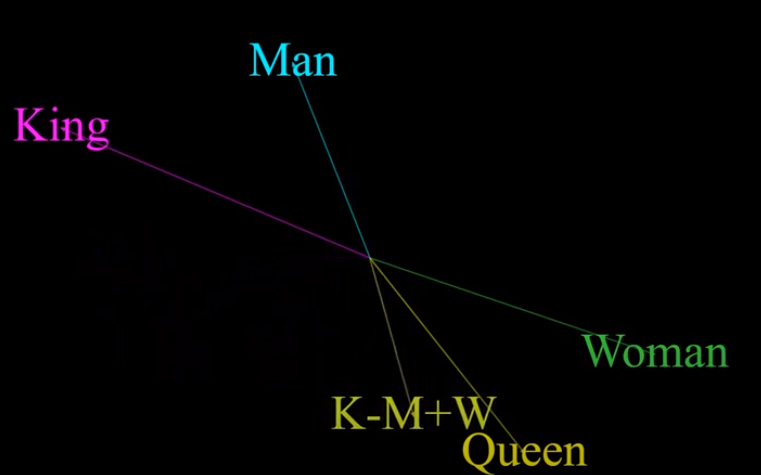

Word Embeddings é a forma utilizada para dar valores numéricos a palavras ou frases, a forma de se fazer isso é montar uma matriz Mppn onde p é o número de todas as palavras, ou tokens, e n é o número de dimensões da rede neural, por isso antes de montar a matriz e bom fazer uma limpeza dos tokens, removendo as ‘stopwords’, por exemplo artigos e preposições, elas não são necessárias e acaba por contaminando o word embeddings com palavras que não ajuda na análise. Outra forma de reduzir o Word Embedding para ser mais preciso é colocar outras restrições como por exemplo palavras que só aparecem uma vez no texto, provavelmente não vai ter muita relevância, outra forma é criando categorias, onde por exemplo o texto tem e-mail, links números, ter uma identificação especifica para cada instancia não é necessária podemos juntar todas as instâncias de um tipo em um mesmo token EMAIL,URL ou NUMERO. Daí podemos montar essa matriz e calcular os valores referentes a relação das palavras.

Mas isso também depende do tipo de texto que estamos utilizando pois se usarmos um banco de dados do wikipedia, ou de notícias de jornal para realizar uma análise de sentimentos de crítica de filmes, não vai dar certo por causa dos termos utilizados em cada caso ser diferente, por isso que a língua e a origem do dataset do word embeddings é tão importante.





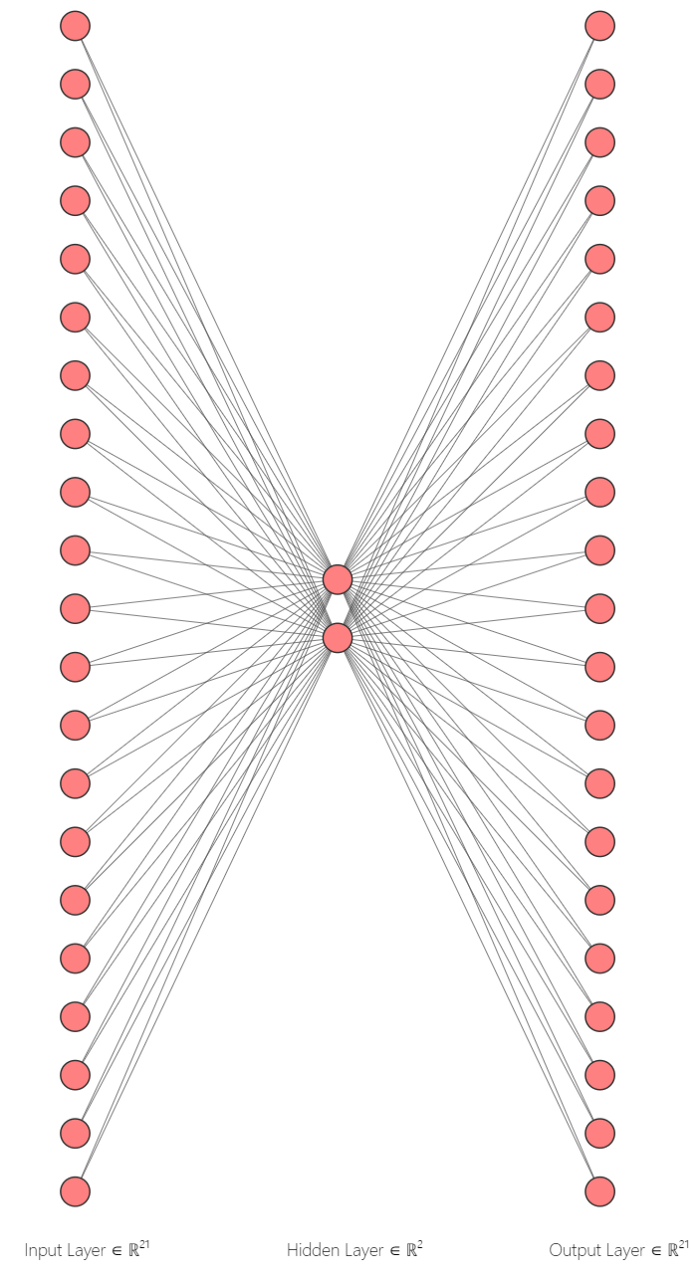

[Video Interessante](https://www.youtube.com/watch?v=gQddtTdmG_8)

[Baixe esse texto para o exemplo e coloque o nome de dom.txt](http://www.gutenberg.org/cache/epub/55752/pg55752.txt)



In [ ]:
#Instalação e chamada das bibliotecas
!pip install nltk
!pip install gensim
from google.colab import files
import nltk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
nltk.download('punkt')  
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings(action = 'ignore')

nltk.download('stopwords')

#Código para pegar o txt
sample = files.upload()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving dom.txt to dom.txt


In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.append('ella')
stopwords.append('elle')
stopwords.append('elles')
stopwords.append('ellas')
stopwords.append('assim')
stopwords.append('tambem')
stopwords.append('outra')
stopwords.append('outro')
stopwords.append('ainda')
stopwords.append('aqui')
stopwords.append('á')
stopwords.append('ser')
stopwords.append('tão')
stopwords.append('ás')
stopwords.append('has')

# Filtro para não pegar pontuação 
def filtrar_palavras(sentenca):
  tokens = [word.lower() for word in nltk.word_tokenize(sentenca) if word.isalnum()]
  tokens = [token for token in tokens if token not in stopwords]
  return tokens

# Separar as palavras em tolkiens
def tokenize_sentenca(texto):
  return [filtrar_palavras(sentenca) for sentenca in nltk.sent_tokenize(texto)]  

sentencas = []

data_path = "dom.txt"

with open(data_path, 'r') as f:
  texto = f.read()
  sentencas.extend(tokenize_sentenca(texto))

# Cria modelo CBOW trabalha de modo que prediz a probabilidade da próxima palavra de acordo com o contexto analisando as palavras anteriores
modelo1 = gensim.models.Word2Vec(sentencas,  min_count = 5, size = 50, window = 5)
print('CBOW')
print(modelo1.similarity('capitú','escobar'))
print(modelo1.most_similar_cosmul(positive=['seminario']))
print(modelo1.most_similar(positive=['mulher','mar'],negative=['homem'],topn=3))
print(modelo1.similar_by_word('capitú'))  
print(modelo1.similar_by_word('escobar'))
print(modelo1.similar_by_word('mar'))  

# Cria modelo Skip Gram faz a predição de acordo com a quantidade de vezes que a palavra é repetida depois da outra
modelo2 = gensim.models.Word2Vec(sentencas, min_count = 5, size = 50, window = 5, sg = 1)
print('Skip-Gram')
print(modelo2.similarity('capitú','escobar'))
print(modelo2.most_similar_cosmul(positive=['seminario']))
print(modelo2.most_similar(positive=['mulher','mar'],negative=['homem'],topn=3))
print(modelo2.similar_by_word('capitú')) 
print(modelo2.similar_by_word('escobar'))
print(modelo2.similar_by_word('mar')) 

CBOW
0.9995316
[('olhos', 0.9998294711112976), ('ver', 0.9998194575309753), ('agora', 0.9998116493225098), ('nada', 0.999801754951477), ('mãe', 0.9997979998588562), ('casa', 0.9997943639755249), ('todos', 0.9997910261154175), ('vida', 0.9997907280921936), ('rua', 0.9997904300689697), ('ceu', 0.9997897148132324)]
[('fóra', 0.9974417686462402), ('ideia', 0.9973647594451904), ('padua', 0.9971925616264343)]
[('casa', 0.999761700630188), ('mim', 0.9997236728668213), ('tempo', 0.9997056722640991), ('antes', 0.9997028112411499), ('olhos', 0.999681830406189), ('algum', 0.9996767044067383), ('alguma', 0.9996706247329712), ('tudo', 0.9996650815010071), ('disse', 0.9996625185012817), ('outros', 0.9996620416641235)]
[('casa', 0.9995978474617004), ('olhos', 0.9995936751365662), ('mãe', 0.9995633959770203), ('mim', 0.9995575547218323), ('capitú', 0.9995316863059998), ('melhor', 0.9995296597480774), ('filho', 0.9995282292366028), ('antes', 0.999524712562561), ('ideia', 0.9995205998420715), ('pouco', 

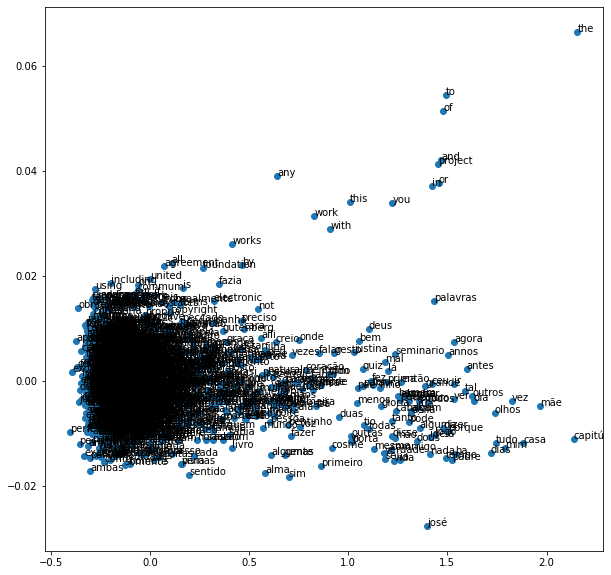

In [ ]:
plt.figure(figsize=(10, 10))
vocab = modelo1.wv.vocab
pca = PCA(n_components=2)
my_pca = pca.fit_transform(modelo1[vocab])
plt.scatter(my_pca[:,0],my_pca[:,1])
for i,word in enumerate(vocab):
  plt.annotate(word, xy=(my_pca[i,0],my_pca[i,1]))
plt.show()

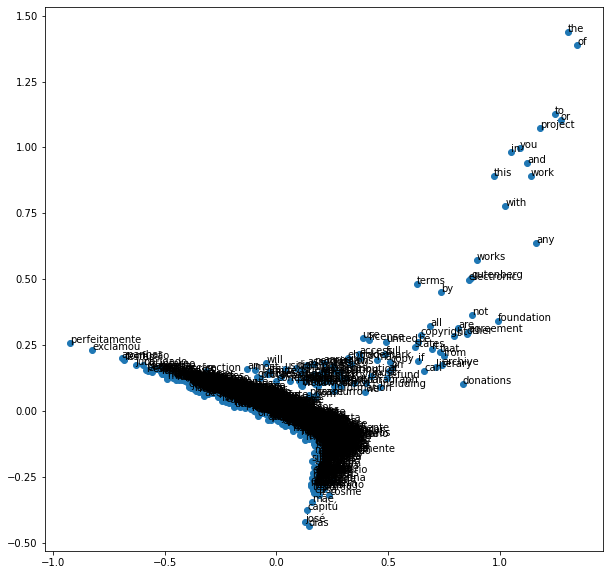

In [ ]:
plt.figure(figsize=(10, 10))
vocab = modelo2.wv.vocab
pca = PCA(n_components=2)
my_pca = pca.fit_transform(modelo2[vocab])
plt.scatter(my_pca[:,0],my_pca[:,1])
for i,word in enumerate(vocab):
  plt.annotate(word, xy=(my_pca[i,0],my_pca[i,1]))
plt.show()

#Referências
http://www.nltk.org/howto/portuguese_en.html 

https://arxiv.org/pdf/1708.06025.pdf 

https://stanford.edu/~jlmcc/papers/PDP/Chapter1.pdf 

# Dúvidas?


# Pratica

Baixe um texto de sua preferência e usando o código acima faça um word embbeding e teste várias analises. Não precisa plotar um gráfico.
